## 使うライブラリをインポートして，乱数のseedを固定

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


seed  = 11
np.random.seed(seed)

### フィッティングしたいデータセット$\mathcal{D}$を生成
$$\mathcal{D} = \{ (x_1,y_1),(x_2,y_2), \cdots , (x_N, y_N)\}$$

(30,)
(30,)
[[ -6.39460622  -7.42225447]
 [ -9.61049517 -20.58422207]
 [ -0.73562947   1.4864482 ]
 [  4.49867858  15.76546462]
 [ -1.59592791  -1.04114092]]


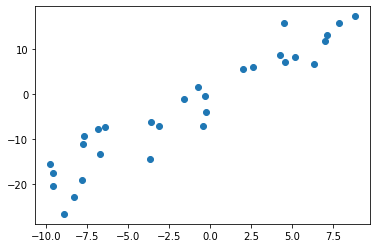

In [28]:
N = 30
x =  20 * (np.random.rand(N)) - 10
print(x.shape)
y = np.sin(x) + x + np.random.normal(x, 5, N)
print(y.shape)

# 2次元 * N個の観測データ
D = np.concatenate([x[:, np.newaxis], y[:, np.newaxis]], axis=1)
print(D[:5])

plt.scatter(x,y)
plt.show()

## モデルのパラメータ$\boldsymbol{a}$を推定する準備（変数をおく）
$$ \boldsymbol{x}_i = \begin{pmatrix}
    1\\
    x_i
    \end{pmatrix}
$$

$$ \boldsymbol{X} = \begin{pmatrix}
     \boldsymbol{x_1}^T\\
    \boldsymbol{x_2}^T\\
    \vdots \\
    \boldsymbol{x_N}^T
    \end{pmatrix}
$$

$$\boldsymbol{y} = \begin{pmatrix}
    y_1\\
    y_2\\
    \vdots \\
    y_N
    \end{pmatrix}
$$

In [29]:
#dataset D で用いた変数を使って，欲しい行列・ベクトルを新しく定義する
# x(shape: (2, N)...これは(1,x_i)を並べた行列)
one_mat = np.ones(N)
#print(one_mat)
#print(x)
X = np.concatenate([one_mat[:, np.newaxis], x[:, np.newaxis]], axis=1)
#print(x_i[:5])
#X = [i.T for i in x_i] 
print(X[:5])
# y（shape: (N,1)）になるようにshapeを整える）
print(y.shape)
y_reshaped = y.reshape([N, 1])
print(y_reshaped[:5])

[[ 1.         -6.39460622]
 [ 1.         -9.61049517]
 [ 1.         -0.73562947]
 [ 1.          4.49867858]
 [ 1.         -1.59592791]]
(30,)
[[ -7.42225447]
 [-20.58422207]
 [  1.4864482 ]
 [ 15.76546462]
 [ -1.04114092]]


## モデルのパラメータ$\boldsymbol{a}$を推定する
$$\boldsymbol{a}
= \begin{pmatrix}a_0\\a_1\end{pmatrix}
= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

In [30]:
# @は内積の演算子， np.linalg.invは逆行列を計算してくれるライブラリ
a = np.linalg.inv(X.T @ X) @ X.T @ y_reshaped
print(a.shape)
print(a)

(2, 1)
[[-0.39537169]
 [ 1.93065404]]


## 推定したモデル$\hat{y}$を描画する

In [32]:
# (1, x_{new})が縦に並ぶ行列Xnewをつくる
Nnew = 100
x_new = 20 * (np.random.rand(Nnew)) - 10
ones = np.ones(Nnew)
Xnew = np.concatenate([ones[:, np.newaxis], x_new[:, np.newaxis]], axis=1)
print(Xnew.shape)

Y_hat = Xnew @ a
print(Y_hat.shape)

(100, 2)
(100, 1)


## 観測データの分布上に学習したモデルをプロットする

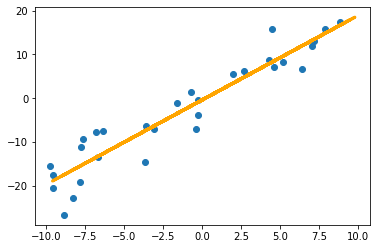

In [33]:
plt.scatter(x,y)
plt.plot(x_new, Y_hat, linewidth=3, color='orange')
plt.show()